In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
# Read data and look at first few rows
file_path = "D:/CapstoneProject/bajaj_finserv_capstone/Daily_work/New DataSet/Cleaned Data/"
file_name = "BajajDataset_Cleaned_left.csv"
df = pd.read_csv(file_path+file_name)
df.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

  TestRideOffered    FollowUp SourceOfEnquiry FollowUpDone BranchType  \
0      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
1      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
2      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
3      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
4      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   

   TotalAmount       City          State     DealerCity ModelFamily  
0      38081.0    Gurgaon        HARYANA     DHUNDAHERA    Splendor  
1      64326.0  Allahabad  UTTAR PRADESH         SORAON         CBZ  
2      38081.0  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor  
3      38081.0  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor  
4      46481.0  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city

In [3]:
print(max(df['TotalAmount']))
print(min(df['TotalAmount']))

173099.0
29989.0


In [4]:
df['totalamount_bin'] = pd.cut(df['TotalAmount'], [0, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000], 
                              labels=['0-30000', '30000-40000', '40000-50000', '50000-60000','60000-70000','70000-80000','80000-90000', '90000-100000','100000-110000','110000-120000','120000-130000', '130000-140000', '140000-150000', '150000-160000', '160000-170000', '170000-180000', '180000-190000', '190000-200000'])

In [5]:
df.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

   ...    FollowUp SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
0  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
1  ...  No Enquiry      No Enquiry   No Enquiry      Urban     64326.0   
2  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
3  ...  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0   
4  ...  No Enquiry      No Enquiry   No Enquiry      Urban     46481.0   

        City          State     DealerCity ModelFamily totalamount_bin  
0    Gurgaon        HARYANA     DHUNDAHERA    Splendor     30000-40000  
1  Allahabad  UTTAR PRADESH         SORAON         CBZ     60000-70000  
2  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor     30000-40000  
3  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor     30000-40000  
4  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city     40000-50000  

[5 rows x 21 columns]

In [6]:
df_copy = df.copy()

In [7]:
df_copy.columns

Index([&#39;InvoiceDate&#39;, &#39;DealerState&#39;, &#39;Segment&#39;, &#39;Enquiry_flag&#39;, &#39;Booking_flag&#39;,
       &#39;PAYMENT_TYPE&#39;, &#39;CustomerCode&#39;, &#39;InvoiceNo&#39;, &#39;LoanTaken&#39;, &#39;LeadType&#39;,
       &#39;TestRideOffered&#39;, &#39;FollowUp&#39;, &#39;SourceOfEnquiry&#39;, &#39;FollowUpDone&#39;,
       &#39;BranchType&#39;, &#39;TotalAmount&#39;, &#39;City&#39;, &#39;State&#39;, &#39;DealerCity&#39;,
       &#39;ModelFamily&#39;, &#39;totalamount_bin&#39;],
      dtype=&#39;object&#39;)

In [8]:
df = df.drop(columns = ['InvoiceDate', 'CustomerCode', 'Enquiry_flag', 'Booking_flag', 'InvoiceNo', 'FollowUpDone', 'FollowUp', 'SourceOfEnquiry', 'LeadType', 'TotalAmount'])

In [9]:
df.head()

DealerState Segment    PAYMENT_TYPE  LoanTaken TestRideOffered  \
0        Haryana      M1  Loan not taken          0      No Enquiry   
1  Uttar Pradesh      M3  Loan not taken          0      No Enquiry   
2  Uttar Pradesh      M1  Loan not taken          0      No Enquiry   
3  Uttar Pradesh      M1  Loan not taken          0      No Enquiry   
4  Uttar Pradesh      M1  Loan not taken          0      No Enquiry   

  BranchType       City          State     DealerCity ModelFamily  \
0      Urban    Gurgaon        HARYANA     DHUNDAHERA    Splendor   
1      Urban  Allahabad  UTTAR PRADESH         SORAON         CBZ   
2      Urban  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor   
3      Urban  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor   
4      Urban  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city   

  totalamount_bin  
0     30000-40000  
1     60000-70000  
2     30000-40000  
3     30000-40000  
4     40000-50000

In [10]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

DealerState  Segment  PAYMENT_TYPE  LoanTaken  TestRideOffered  BranchType  \
0            9        0             1          0                2           2   
1           28        2             1          0                2           2   
2           28        0             1          0                2           2   
3           28        0             1          0                2           2   
4           28        0             1          0                2           2   

   City  State  DealerCity  ModelFamily  totalamount_bin  
0   161     12         166            6                9  
1    10     32         509            2               12  
2    10     32         239            6                9  
3    10     32         114            6                9  
4    10     32         357            7               10

In [11]:
km_cao = KModes(n_clusters=8, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 57835, cost: 2034664.0


In [12]:
# Predicted Clusters
fitClusters_cao

array([2, 0, 2, ..., 4, 4, 4], dtype=uint16)

In [13]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns
clusterCentroidsDf

DealerState  Segment  PAYMENT_TYPE  LoanTaken  TestRideOffered  BranchType  \
0           28        3             1          0                1           2   
1           25        0             1          0                2           1   
2           16        0             1          0                1           2   
3            0        0             1          0                2           2   
4           13        3             1          0                2           2   
5           16        3             1          0                2           1   
6            2        3             1          0                0           2   
7           13        3             1          0                3           1   

   City  State  DealerCity  ModelFamily  totalamount_bin  
0   167     32         238            0               13  
1    91     29         129            7               10  
2     2     19         393            6                9  
3   277      1         564            7               10  
4    39     16          48            4               14  
5   251     19         434            0               13  
6   124      3         271            0               14  
7    93     16         492            0               13

In [14]:
# km_huang = KModes(n_clusters=8, init = "Huang", n_init = 1, verbose=1)
# fitClusters_huang = km_huang.fit_predict(df)

In [15]:
# Predicted clusters
# fitClusters_huang

In [18]:
labels = km_cao.labels_
print(set(labels))
print(metrics.silhouette_score(df, labels))

{0, 1, 2, 3, 4, 5, 6, 7}
-0.08461917690599169


In [16]:
df = df_copy.reset_index()

In [17]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [18]:
combinedDf.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

   ... SourceOfEnquiry FollowUpDone BranchType TotalAmount       City  \
0  ...      No Enquiry   No Enquiry      Urban     38081.0    Gurgaon   
1  ...      No Enquiry   No Enquiry      Urban     64326.0  Allahabad   
2  ...      No Enquiry   No Enquiry      Urban     38081.0  Allahabad   
3  ...      No Enquiry   No Enquiry      Urban     38081.0  Allahabad   
4  ...      No Enquiry   No Enquiry      Urban     46481.0  Allahabad   

           State     DealerCity ModelFamily totalamount_bin cluster_predicted  
0        HARYANA     DHUNDAHERA    Splendor     30000-40000                 2  
1  UTTAR PRADESH         SORAON         CBZ     60000-70000                 0  
2  UTTAR PRADESH   Hanuman Ganj    Splendor     30000-40000                 2  
3  UTTAR PRADESH  Bharwari (NP)    Splendor     30000-40000                 2  
4  UTTAR PRADESH   MIYA KA PURA   Star city     40000-50000                 3  

[5 rows x 22 columns]

In [19]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]

In [20]:
cluster_0.head(5)

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
1      00:00.0  Uttar Pradesh      M3             1             1   
5     4/9/2015        Gujarat      S1             0             0   
6    5/15/2015        Gujarat      S1             0             0   
14     00:00.0        Gujarat      S2             0             0   
15   5/14/2018        Gujarat      S1             0             0   

      PAYMENT_TYPE   CustomerCode              InvoiceNo  LoanTaken  \
1   Loan not taken  CUS-274651284     ASDA274651800055_1          0   
5   Loan not taken  ASC-10000-001  AVSI100002015000010_1          0   
6   Loan not taken   ASC-10000-02  AVSI100002015000055_1          0   
14  Loan not taken   ASC-10002-02     AVSI100021700108_1          0   
15  Loan not taken   ASC-10002-01     AVSI100021800011_1          0   

      LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
1   No Enquiry  ...      No Enquiry   No Enquiry      Urban     64326.0   
5   No Enquiry  ...      No Enquiry   No Enquiry      Urban     72027.0   
6   No Enquiry  ...      No Enquiry   No Enquiry      Urban     72027.0   
14  No Enquiry  ...      No Enquiry   No Enquiry      Urban     78274.0   
15  No Enquiry  ...      No Enquiry   No Enquiry      Urban     78274.0   

         City          State DealerCity ModelFamily totalamount_bin  \
1   Allahabad  UTTAR PRADESH     SORAON         CBZ     60000-70000   
5   Ahmedabad        GUJARAT  AHMEDABAD      Apache     70000-80000   
6   Ahmedabad        GUJARAT  AHMEDABAD      Apache     70000-80000   
14      Anand        GUJARAT     BARODA      Apache     70000-80000   
15   Vadodara        GUJARAT     BARODA      Apache     70000-80000   

   cluster_predicted  
1                  0  
5                  0  
6                  0  
14                 0  
15                 0  

[5 rows x 22 columns]

In [21]:
cluster_1.head(5)

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
335     00:00.0    West Bengal      M3             0             0   
367  10/28/2014  Uttar Pradesh      M1             0             0   
369   4/27/2015  Uttar Pradesh      M1             0             0   
370   5/21/2015  Uttar Pradesh      M1             0             0   
371   6/22/2015  Uttar Pradesh      M1             0             0   

       PAYMENT_TYPE  CustomerCode              InvoiceNo  LoanTaken  \
335  Loan not taken    10034ASC22   AVSI10034201700008_1          0   
367  Loan not taken  10046-ASC-01  AVSI100462014000131_1          0   
369  Loan not taken  10046-SUP-02  AVSI100462015000064_1          0   
370  Loan not taken  10046-ASC-01  AVSI100462015000122_1          0   
371  Loan not taken  10046-ASC-01  AVSI100462015000201_1          0   

       LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
335  No Enquiry  ...      No Enquiry   No Enquiry      Rural     63952.0   
367  No Enquiry  ...      No Enquiry   No Enquiry      Rural     46481.0   
369  No Enquiry  ...      No Enquiry   No Enquiry      Rural     46481.0   
370  No Enquiry  ...      No Enquiry   No Enquiry      Rural     38513.0   
371  No Enquiry  ...      No Enquiry   No Enquiry      Rural     38513.0   

               City          State    DealerCity ModelFamily totalamount_bin  \
335  East Midnapore    WEST BENGAL     KHARAGPUR         CBZ     60000-70000   
367   Muzaffarnagar  UTTAR PRADESH  MUZAFARNAGAR   Star city     40000-50000   
369          Bagpat  UTTAR PRADESH  MUZAFARNAGAR   Star city     40000-50000   
370   Muzaffarnagar  UTTAR PRADESH  MUZAFARNAGAR    Splendor     30000-40000   
371   Muzaffarnagar  UTTAR PRADESH  MUZAFARNAGAR    Splendor     30000-40000   

    cluster_predicted  
335                 1  
367                 1  
369                 1  
370                 1  
371                 1  

[5 rows x 22 columns]

In [22]:
cluster_2.head(5)

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0      00:00.0        Haryana      M1             1             1   
2      00:00.0  Uttar Pradesh      M1             1             1   
3      00:00.0  Uttar Pradesh      M1             1             1   
8    11/7/2015        Gujarat      M1             0             0   
12     00:00.0        Gujarat      M1             0             0   

      PAYMENT_TYPE   CustomerCode              InvoiceNo  LoanTaken  \
0   Loan not taken  CUS-272013139     ASDA272011800034_1          0   
2   Loan not taken   CUS-28970748     ASDA289701800008_1          0   
3   Loan not taken  CUS-295861155     ASDA295861800014_1          0   
8   Loan not taken   ASC-10000-02  AVSI100002015000212_1          0   
12  Loan not taken   ASC-10002-01     AVSI100021700058_1          0   

      LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
0   No Enquiry  ...      No Enquiry   No Enquiry      Urban     38081.0   
2   No Enquiry  ...      No Enquiry   No Enquiry      Urban     38081.0   
3   No Enquiry  ...      No Enquiry   No Enquiry      Urban     38081.0   
8   No Enquiry  ...      No Enquiry   No Enquiry      Urban     38081.0   
12  No Enquiry  ...      No Enquiry   No Enquiry      Urban     38081.0   

         City          State     DealerCity ModelFamily totalamount_bin  \
0     Gurgaon        HARYANA     DHUNDAHERA    Splendor     30000-40000   
2   Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor     30000-40000   
3   Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor     30000-40000   
8   Ahmedabad        GUJARAT      AHMEDABAD    Splendor     30000-40000   
12   Vadodara        GUJARAT         BARODA    Splendor     30000-40000   

   cluster_predicted  
0                  2  
2                  2  
3                  2  
8                  2  
12                 2  

[5 rows x 22 columns]

In [23]:
cluster_3.head(5)

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
4      00:00.0  Uttar Pradesh      M1             1             1   
7    6/30/2015        Gujarat      M1             0             0   
9    11/7/2015        Gujarat      M1             0             0   
10  11/27/2015        Gujarat      M2             0             0   
11   5/13/2016        Gujarat      M2             0             0   

      PAYMENT_TYPE  CustomerCode              InvoiceNo  LoanTaken  \
4   Loan not taken   CUS-6568346     ASDA656831800022_1          0   
7   Loan not taken  ASC-10000-06  AVSI100002015000133_1          0   
9   Loan not taken  ASC-10000-02  AVSI100002015000218_1          0   
10  Loan not taken  ASC-10000-02  AVSI100002015000258_1          0   
11  Loan not taken   ASC-10000-8  AVSI100002016000001_1          0   

      LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
4   No Enquiry  ...      No Enquiry   No Enquiry      Urban     46481.0   
7   No Enquiry  ...      No Enquiry   No Enquiry      Urban     45454.0   
9   No Enquiry  ...      No Enquiry   No Enquiry      Urban     46481.0   
10  No Enquiry  ...      No Enquiry   No Enquiry      Urban     53292.5   
11  No Enquiry  ...      No Enquiry   No Enquiry      Urban     53292.5   

         City          State    DealerCity ModelFamily totalamount_bin  \
4   Allahabad  UTTAR PRADESH  MIYA KA PURA   Star city     40000-50000   
7       Anand        GUJARAT     AHMEDABAD   Star city     40000-50000   
9   Ahmedabad        GUJARAT     AHMEDABAD   Star city     40000-50000   
10  Ahmedabad        GUJARAT     AHMEDABAD    Discover     50000-60000   
11   Mahesana        GUJARAT     AHMEDABAD    Discover     50000-60000   

   cluster_predicted  
4                  3  
7                  3  
9                  3  
10                 3  
11                 3  

[5 rows x 22 columns]

In [24]:
cluster_4.head(5)

InvoiceDate DealerState Segment  Enquiry_flag  Booking_flag  \
29    3/10/2016     Gujarat      S1             0             0   
30    5/31/2016     Gujarat      S1             0             0   
34     3/8/2017     Gujarat      S1             0             0   
52      00:00.0     Haryana      S1             0             0   
121    6/4/2016     Haryana      S1             0             0   

       PAYMENT_TYPE  CustomerCode              InvoiceNo  LoanTaken  \
29   Loan not taken  ASC-10002-02  AVSI100022015000138_1          0   
30   Loan not taken  ASC-10002-02  AVSI100022016000019_1          0   
34   Loan not taken  ASC-10002-02  AVSI100022016000132_1          0   
52   Loan not taken  ASC-10005-14     AVSI100051700439_1          0   
121  Loan not taken   ASC-10005-3  AVSI100052016000140_1          0   

       LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
29   No Enquiry  ...      No Enquiry   No Enquiry      Urban     86463.0   
30   No Enquiry  ...      No Enquiry   No Enquiry      Urban     86463.0   
34   No Enquiry  ...      No Enquiry   No Enquiry      Urban     80857.0   
52   No Enquiry  ...      No Enquiry   No Enquiry      Urban     79474.0   
121  No Enquiry  ...      No Enquiry   No Enquiry      Urban     87450.0   

          City    State DealerCity ModelFamily totalamount_bin  \
29       Anand  GUJARAT     BARODA    Intruder     80000-90000   
30       Anand  GUJARAT     BARODA    Intruder     80000-90000   
34       Anand  GUJARAT     BARODA      Apache     80000-90000   
52   Fatehabad  HARYANA     HISSAR    Intruder     70000-80000   
121       Jind  HARYANA     HISSAR      Apache     80000-90000   

    cluster_predicted  
29                  4  
30                  4  
34                  4  
52                  4  
121                 4  

[5 rows x 22 columns]

In [25]:
cluster_5.head(5)

InvoiceDate DealerState Segment  Enquiry_flag  Booking_flag  \
621     00:00.0       Assam      S1             0             0   
622     00:00.0       Assam      S1             0             0   
623     00:00.0       Assam      S1             0             0   
626     00:00.0       Assam      S1             0             0   
630   5/24/2018       Assam      S1             0             0   

       PAYMENT_TYPE  CustomerCode           InvoiceNo  LoanTaken    LeadType  \
621  Loan not taken  10066-ASC-01  AVSI100661700950_1          0  No Enquiry   
622  Loan not taken  10066-ASC-01  AVSI100661701008_1          0  No Enquiry   
623  Loan not taken  10066-ASC-01  AVSI100661701194_1          0  No Enquiry   
626  Loan not taken  10066-ASC-02  AVSI100661701416_1          0  No Enquiry   
630  Loan not taken  10066-ASC-02  AVSI100661800203_1          0  No Enquiry   

     ... SourceOfEnquiry FollowUpDone BranchType TotalAmount       City  \
621  ...      No Enquiry   No Enquiry      Rural     76275.0  Dibrugarh   
622  ...      No Enquiry   No Enquiry      Rural     77691.0  Dibrugarh   
623  ...      No Enquiry   No Enquiry      Rural     74547.0  Dibrugarh   
626  ...      No Enquiry   No Enquiry      Rural     78274.0  Dibrugarh   
630  ...      No Enquiry   No Enquiry      Rural     73254.0  Dibrugarh   

     State DealerCity ModelFamily totalamount_bin cluster_predicted  
621  ASSAM   TINSUKIA      Apache     70000-80000                 5  
622  ASSAM   TINSUKIA      Apache     70000-80000                 5  
623  ASSAM   TINSUKIA      Apache     70000-80000                 5  
626  ASSAM   TINSUKIA      Apache     70000-80000                 5  
630  ASSAM   TINSUKIA      Apache     70000-80000                 5  

[5 rows x 22 columns]

In [26]:
cluster_6.head(5)

InvoiceDate DealerState Segment  Enquiry_flag  Booking_flag  \
616     00:00.0       Assam      M3             0             0   
617     00:00.0       Assam      M3             0             0   
618     00:00.0       Assam      M3             0             0   
619     00:00.0       Assam      S1             0             0   
620     00:00.0       Assam      S1             0             0   

       PAYMENT_TYPE  CustomerCode           InvoiceNo  LoanTaken    LeadType  \
616  Loan not taken  10066-ASC-06  AVSI100661700275_1          0  No Enquiry   
617  Loan not taken  10066-ASC-01  AVSI100661700622_1          0  No Enquiry   
618  Loan not taken  10066-ASC-06  AVSI100661700676_1          0  No Enquiry   
619  Loan not taken  10066-ASC-01  AVSI100661700707_1          0  No Enquiry   
620  Loan not taken  10066-ASC-01  AVSI100661700868_1          0  No Enquiry   

     ... SourceOfEnquiry FollowUpDone BranchType TotalAmount       City  \
616  ...      No Enquiry   No Enquiry      Rural     64940.0  Dibrugarh   
617  ...      No Enquiry   No Enquiry      Rural     61964.0  Dibrugarh   
618  ...      No Enquiry   No Enquiry      Rural     62732.0  Dibrugarh   
619  ...      No Enquiry   No Enquiry      Rural     81600.0  Dibrugarh   
620  ...      No Enquiry   No Enquiry      Rural     82624.0  Dibrugarh   

     State DealerCity ModelFamily totalamount_bin cluster_predicted  
616  ASSAM   TINSUKIA         CBZ     60000-70000                 6  
617  ASSAM   TINSUKIA         CBZ     60000-70000                 6  
618  ASSAM   TINSUKIA         CBZ     60000-70000                 6  
619  ASSAM   TINSUKIA      Apache     80000-90000                 6  
620  ASSAM   TINSUKIA    Intruder     80000-90000                 6  

[5 rows x 22 columns]

In [27]:
cluster_7.head(5)

InvoiceDate DealerState Segment  Enquiry_flag  Booking_flag  \
6254    8/28/2014   Karnataka      S1             1             1   
21997   1/24/2017   Karnataka      S2             0             1   
22317   11/5/2015   Karnataka      S1             0             1   
22320   1/30/2016   Karnataka      S2             0             1   
22321    2/3/2016   Karnataka      S2             0             1   

         PAYMENT_TYPE  CustomerCode               InvoiceNo  LoanTaken  \
6254   Loan not taken  CUS-10327115   AVSI103272014000003_1          0   
21997  Loan not taken         10351   DVSI101182016000001_1          0   
22317  Loan not taken         11453  DVSI10337NG201500008_1          0   
22320  Loan not taken         11453  DVSI10337NG201500095_1          0   
22321  Loan not taken         11453  DVSI10337NG201500107_1          0   

         LeadType  ... SourceOfEnquiry FollowUpDone BranchType TotalAmount  \
6254   No Enquiry  ...      No Enquiry   No Enquiry      Rural     68102.0   
21997  No Enquiry  ...      No Enquiry   No Enquiry      Urban     78274.0   
22317  No Enquiry  ...      No Enquiry   No Enquiry      Rural     78274.0   
22320  No Enquiry  ...      No Enquiry   No Enquiry      Rural     78274.0   
22321  No Enquiry  ...      No Enquiry   No Enquiry      Rural     78274.0   

                   City      State DealerCity ModelFamily totalamount_bin  \
6254            Bellary  KARNATAKA    BELLARY      Apache     60000-70000   
21997      Chickmagalur  KARNATAKA     HASSAN      Apache     70000-80000   
22317  Dakshina Kannada  KARNATAKA  MANGALORE      Apache     70000-80000   
22320  Dakshina Kannada  KARNATAKA  MANGALORE      Apache     70000-80000   
22321  Dakshina Kannada  KARNATAKA  MANGALORE      Apache     70000-80000   

      cluster_predicted  
6254                  7  
21997                 7  
22317                 7  
22320                 7  
22321                 7  

[5 rows x 22 columns]

In [28]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['FollowUp'],order=combinedDf['FollowUp'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

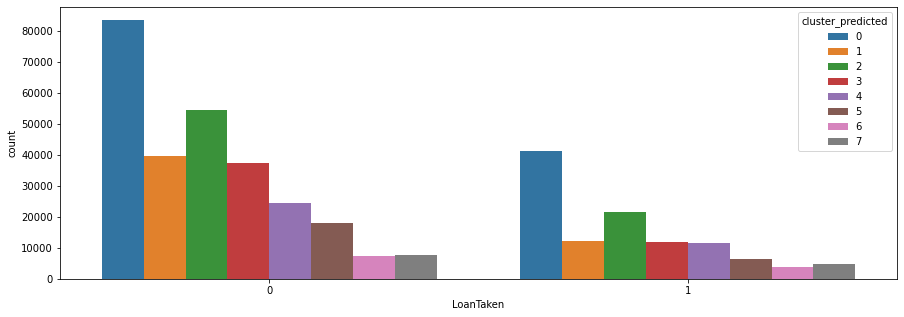

In [29]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['LoanTaken'],order=combinedDf['LoanTaken'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [30]:
df.head(5)

index InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0      0     00:00.0        Haryana      M1             1             1   
1      1     00:00.0  Uttar Pradesh      M3             1             1   
2      2     00:00.0  Uttar Pradesh      M1             1             1   
3      3     00:00.0  Uttar Pradesh      M1             1             1   
4      4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken  ...  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  ...   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  ...   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  ...   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  ...   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  ...   

     FollowUp SourceOfEnquiry FollowUpDone BranchType TotalAmount       City  \
0  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0    Gurgaon   
1  No Enquiry      No Enquiry   No Enquiry      Urban     64326.0  Allahabad   
2  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0  Allahabad   
3  No Enquiry      No Enquiry   No Enquiry      Urban     38081.0  Allahabad   
4  No Enquiry      No Enquiry   No Enquiry      Urban     46481.0  Allahabad   

           State     DealerCity ModelFamily totalamount_bin  
0        HARYANA     DHUNDAHERA    Splendor     30000-40000  
1  UTTAR PRADESH         SORAON         CBZ     60000-70000  
2  UTTAR PRADESH   Hanuman Ganj    Splendor     30000-40000  
3  UTTAR PRADESH  Bharwari (NP)    Splendor     30000-40000  
4  UTTAR PRADESH   MIYA KA PURA   Star city     40000-50000  

[5 rows x 22 columns]

Choosing K
===========

In [ ]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)